# Assignment Problem

##  Problem Statement

In this example there are two refineries and six customer sites located in 8 cities as shown in the following map. The customer sites are labeled in red, and the refineries are labeled in blue. Oil India needs your help to determine how to distribute the product among customers. As per the given data, Panipet doesn't serve Lakshadweep and Bina doesn't serve Dispur.<br>
Transportation costs between sources and destinations are given in units of ₹/ton of goods shipped, and list in the following table along with source capacity and demand requirements.

|Customer|Bina (₹/ton)|Panipat (₹/ton)|Demand|
| --- | --- | --- | --- |
|Dispur| - | 2.5 | 125 |
|Lakshadweep| 2.5 | - | 175 |
|Bhind| 1.6 | 2.0 | 225 |
|Agra| 1.4 | 1.0 | 250 |
|Sawai| 0.8 | 1.0 | 225 |
|Aligarh| 1.4 | 0.8 | 200 |
|<b>Supply|<b>550|<b>700| |

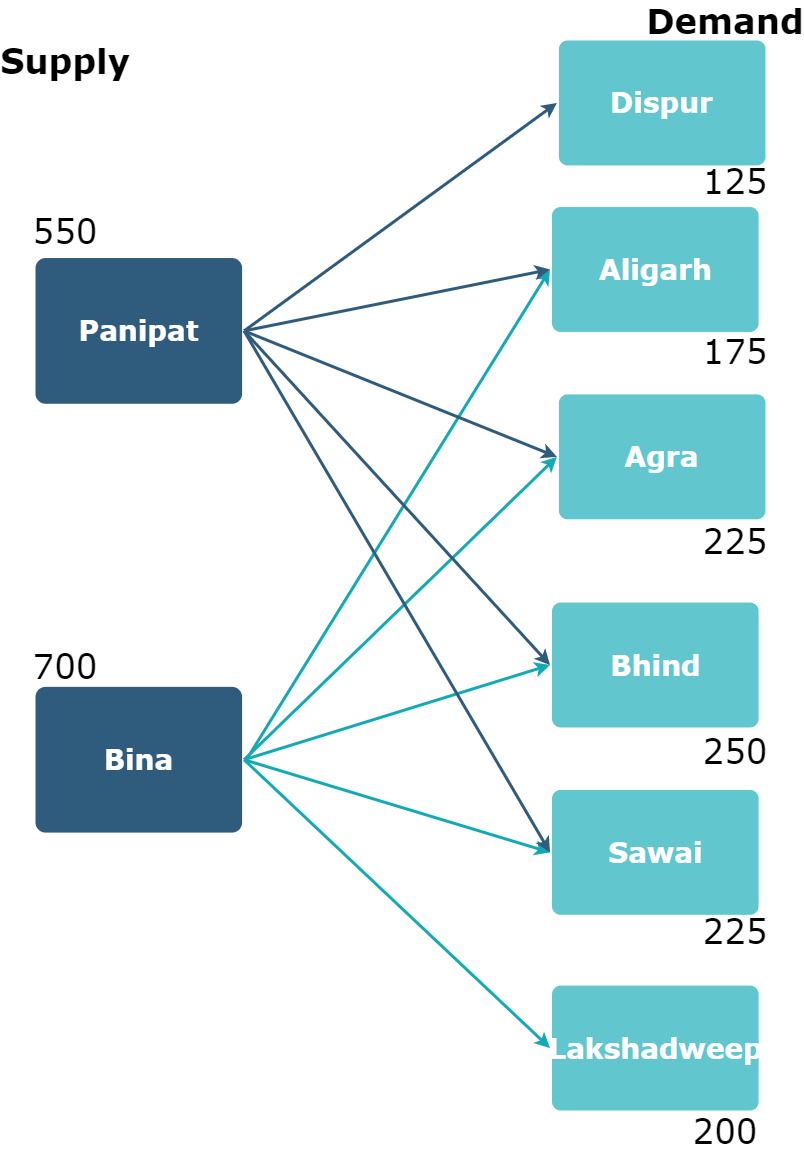

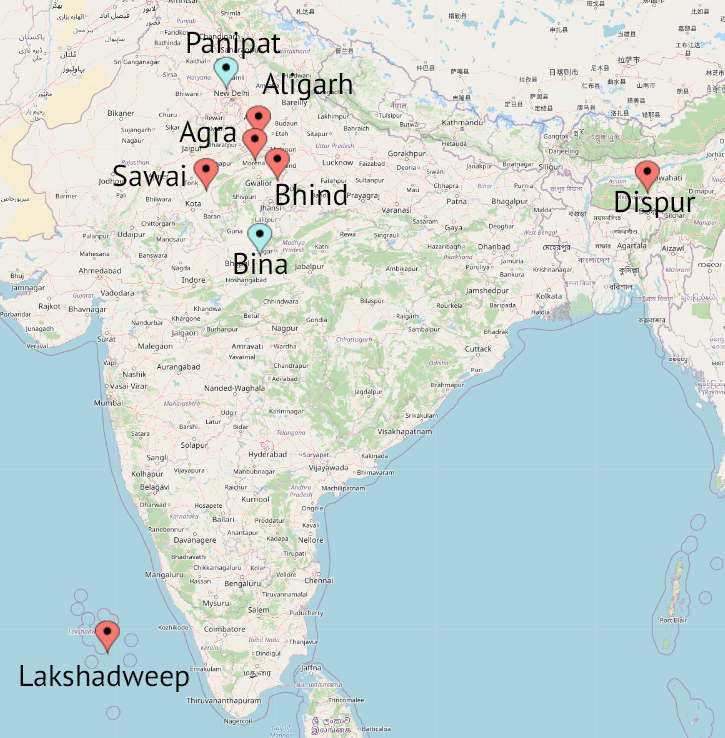

### Step1:
<b> Import Pyomo Enviornment </b>

### Step2:
<b>Specify / import data</b>

In [3]:
Demand = {
   'DIS':   125,        # Dispur
   'LAK':   175,        # Lakshadweep
   'BHI':   225,        # Bhind
   'AGR':   250,        # Agra
   'SAW':   225,        # Sawai
   'ALI':   200         # Aligarh
}

Supply = {
   'BIN':   550,        # Bina
   'PAN':   700         # Panipat
}

# Transportation cost for Dispur-Bina and Lakshadweep-Panipet are assumed to be very high values
# to ensure that the optimum solution does not contain this combination as the objective is to minimise the cost.
# This is known as big-M method in linear programming and is beyond the scope of this module

T = {
    ('DIS','BIN'): 1000,
    ('DIS','PAN'): 2.5,
    ('LAK','BIN'): 2.5,
    ('LAK','PAN'): 1000,
    ('BHI','BIN'): 1.6,
    ('BHI','PAN'): 2.0,
    ('AGR','BIN'): 1.4,
    ('AGR','PAN'): 1.0,
    ('SAW','BIN'): 0.8,
    ('SAW','PAN'): 1.0,
    ('ALI','BIN'): 1.4,
    ('ALI','PAN'): 0.8
}

### Step3:
<b> Create Model Object</b>

### Step4:
<b> Define indexes</b> <br>
 We could directly use, Python lists, dictonaries and other iterable data structures or create a Pyomo set. 

### Step5:
<b>Define Decision Variable</b>

### Step6:
<b>Define Objective</b>

### Step7:
<b>Define Constraints</b>

In [8]:
#Total oil supplied to customers from any refinery, can't exceed the refinery capacity
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])

#Customer demand must be completly met        


<b>Note:</b> Using ConstraintList() is an alternative way of adding subscipted constraints in Pyomo.

### Step8:
<b>Create solver & solve model </b><br>
Note: It is important to know if you have created a liner(LP), integer(IP), mixed integer(MIP), non-linear (NLP), or mixed integer non-linear (MINLP) model and choose the most suitable solver accordingly. We have setup glpk for LP, IP and MIP type problems and ipopt for NLP type.

In [9]:
result = SolverFactory('glpk').solve(model)
result.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1715.0
  Upper bound: 1715.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 13
  Number of nonzeros: 25
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03788399696350098
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

### Step8:
<b>Display Results </b>

In [10]:
for c in CUS:
    for s in SRC:
        print(c, s, model.x[c,s]())
        
if (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal):
    print("Total Shipping Costs = ",model.Cost())
    print("\nShipping Table:")
    for s in SRC:
        for c in CUS:
            if model.x[c,s]() > 0:
                print("Ship from ", s," to ", c, ":", model.x[c,s]())
else:
    print("No feasible solution found")

DIS BIN 0.0
DIS PAN 125.0
LAK BIN 175.0
LAK PAN 0.0
BHI BIN 225.0
BHI PAN 0.0
AGR BIN 0.0
AGR PAN 250.0
SAW BIN 150.0
SAW PAN 75.0
ALI BIN 0.0
ALI PAN 200.0
Total Shipping Costs =  1715.0

Shipping Table:
Ship from  BIN  to  LAK : 175.0
Ship from  BIN  to  BHI : 225.0
Ship from  BIN  to  SAW : 150.0
Ship from  PAN  to  DIS : 125.0
Ship from  PAN  to  AGR : 250.0
Ship from  PAN  to  SAW : 75.0
Ship from  PAN  to  ALI : 200.0


# Excercise

<b> 3.1</b> We introduced the concept of checking solver status before printing solution results. This is because if the supply is lesser than the demand then the constraint forcing to meet customer demand can not be satisfied and no feasible solution would be found. If we reduce the supply of Bina from 550 to 450 what would happen?

In [11]:
Supply = {
   'BIN':   450,        # Bina
   'PAN':   700         # Panipat
}

model2 = ConcreteModel()

model2.x = Var(CUS, SRC, domain = NonNegativeReals)

model2.Cost = Objective(expr = sum([T[c,s]*model2.x[c,s] for c in CUS for s in SRC]), sense = minimize)

#Total demand to customers from 1 refinery, can't exceed the refinery capacity
model2.src = ConstraintList()
for s in SRC:
    model2.src.add(sum([model2.x[c,s] for c in CUS]) <= Supply[s])

#Customer deamnd mut be completly met        
model2.dmd = ConstraintList()
for c in CUS:
    model2.dmd.add(sum([model2.x[c,s] for s in SRC]) == Demand[c])

result2 = SolverFactory('glpk').solve(model2)
result2.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 13
  Number of nonzeros: 25
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.02905416488647461


In [12]:
if (result2.solver.status == SolverStatus.ok) and (result2.solver.termination_condition == TerminationCondition.optimal):
    print("Total Shipping Costs = ",model2.Cost())
    print("\nShipping Table:")
    for s in SRC:
        for c in CUS:
            if model.x[c,s]() > 0:
                print("Ship from ", s," to ", c, ":", model2.x[c,s]())
else:
    print("No feasible solution found")

No feasible solution found


<b> 3.2</b> How can we return a feasible solution?

In [13]:
Supply = {
   'BIN':   450,        # Bina
   'PAN':   700         # Panipat
}

model3 = ConcreteModel()

# Defining model variables
model3.x = Var(CUS, SRC, domain = NonNegativeReals)
model3.surplus = Var(CUS, domain = NonNegativeReals)

#Making use of Big M concepts
model3.Cost = Objective(expr = (sum([T[c,s]*model3.x[c,s] for c in CUS for s in SRC]) + \
                                sum(999 * model3.surplus[c] for c in CUS)), sense = minimize)

#Total demand to customers from 1 refinery, can't exceed the refinery capacity
model3.src = ConstraintList()
for s in SRC:
    model3.src.add(sum([model3.x[c,s] for c in CUS]) <= Supply[s])

#Customer deamnd must be completely met        
model3.dmd = ConstraintList()
for c in CUS:
    model3.dmd.add(sum([model3.x[c,s] for s in SRC]) + model3.surplus[c] == Demand[c])

result3 = SolverFactory('glpk').solve(model3)
result3.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 51550.0
  Upper bound: 51550.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 19
  Number of nonzeros: 31
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.032911062240600586
# ----------------------------------------------------------
#   Solution Information
# ------------------------------

In [15]:
#Improved printing
if (result3.solver.status == SolverStatus.ok) and (result3.solver.termination_condition == TerminationCondition.optimal):
    print("Total Shipping Costs = ",model3.Cost())
    print("\nShipping Table:")
    for s in SRC:
        for c in CUS:
            if model.x[c,s]() > 0:
                print("Ship from ", s," to ", c, ":", model3.x[c,s]())
    print()
    for c in CUS:
        if(model3.surplus[c]() > 0):
            print("Excess supply of", model3.surplus[c](), 'is needed for', c)
else:
    print("No feasible solution found")

Total Shipping Costs =  51550.0

Shipping Table:
Ship from  BIN  to  LAK : 125.0
Ship from  BIN  to  BHI : 225.0
Ship from  BIN  to  SAW : 100.0
Ship from  PAN  to  DIS : 125.0
Ship from  PAN  to  AGR : 250.0
Ship from  PAN  to  SAW : 125.0
Ship from  PAN  to  ALI : 200.0

Excess supply of 50.0 is needed for LAK
